# Esercitazione 6

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

## L'algoritmo di Metropolis

Si vuole campionare una densità di probabilità $p(x)$. L'algoritmo prevede che si cerchi una probabilità di transizione $K(x|y)$ regolare ed ergodica, tale per cui
$$ p(x) = \int K(x|y)p(y)dy $$
ossia tale che $p(x)$ sia invariante rispetto ad essa. Si può semplificare il problema cercando una $K$ che soddisfi il bilancio dettagliato:

$$ K(x|y)p(y) = K(y|x)p(x). $$

Una possibile soluzione è: $K(x|y) = T(x|y)A(x|y)$, dove, data $T(x|y)$, $A(x|y)$ può essere presa nella forma

$$ A(x|y) = \min[1, q(x|y)], \quad \text{con}\quad q(x|y) = \frac{T(y|x)p(x)}{T(x|y)p(y)} > 0$$
    
La scelta di $T(x|y)$ determina l'efficienza dell'algoritmo. Nel metropolis si sceglie $T$ tale che $ T(x|y) = T(y|x) $. In questo caso $A(x|y)$ si riduce a
$$ A(x|y) = \min\Big[1, \frac{p(x)}{p(y)}\Big] $$

## Il modello di Ising

Il modello descrive un sistema di $N$ particelle dotate di spin che interegiscono tra di loro. Nel nostro caso il sistema è monodimensionale e le particelle, di spin semintero, interagiscono solo con quelle adiacenti. L'hamiltoniana di tale sistema è (poniamo $\mu_B=1$ e $k_B=1$)
$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

Vogliamo simulare un sistema di $50$ spin con $J = 1$, utilizzando l'algoritmo di Metropolis e il campionamento di Gibbs. Valuteremo i valori medi di alcune osservabili (energia interna, capacità termica, magnetizzazione e suscettività magnetica) al variare della temperatura del sistema e li confronteremo con le soluzioni analitiche, note per il modello di Ising monodimensionale.

La densità di probabilità $p$ che viene camponata è la distribuzione di Boltzmann, che è la probabilità che un sistema si trovi in un determinato stato. Il passo proposto nell'algoritmo di Metropolis consiste nell'invertire casuamente uno dei 50 spin. Il campionmento di Gibbs è una versione semlificata del Metropolis in cui ogni nuovo passo proposto viene sempre accettato.

## Esercizio

Vengono camponati 10 punti nell'intervallo di temperature $[0.5, 2]$. Per ognuno il sistema viene equilibrato, ossia viene fatto evolvere fino a quando non raggiunge una condizione stabile per cui sia possibile iniziare a misurare le quantità di nostro interesse. Dopo alcuni test, si è scelto 10000 passi di equilibrazione. Raggiunto l'equilibrio, vengono eseguiti $8\cdot 10^5$ step di simulazione, suddivisi in $20$ blocchi. I valori medi delle osservabili e le loro incertezze sono calcolati a partire dai valori medi di ogni blocco. In questo modo si rimuove la correlazione tra stati consecutivi della simulazione (nell'esercitazione 7 viene studiato nel dettaglio il problema della correlazione tra punti generati dal Metropolis).

Solo per quanto riguarda la magnetizzazione, viene eseguita una simulazione anche nel caso di presenza di campo magnetico esterno (relativo al termine con $h$ nell'hamiltoniana), altrimenti sarebbe nulla.

Nei grafici, con il tratto continuo è indicata la soluzione analitica nota, mentre con le linee continue provviste di barre d'errore i punti calcolati con la simulazione.

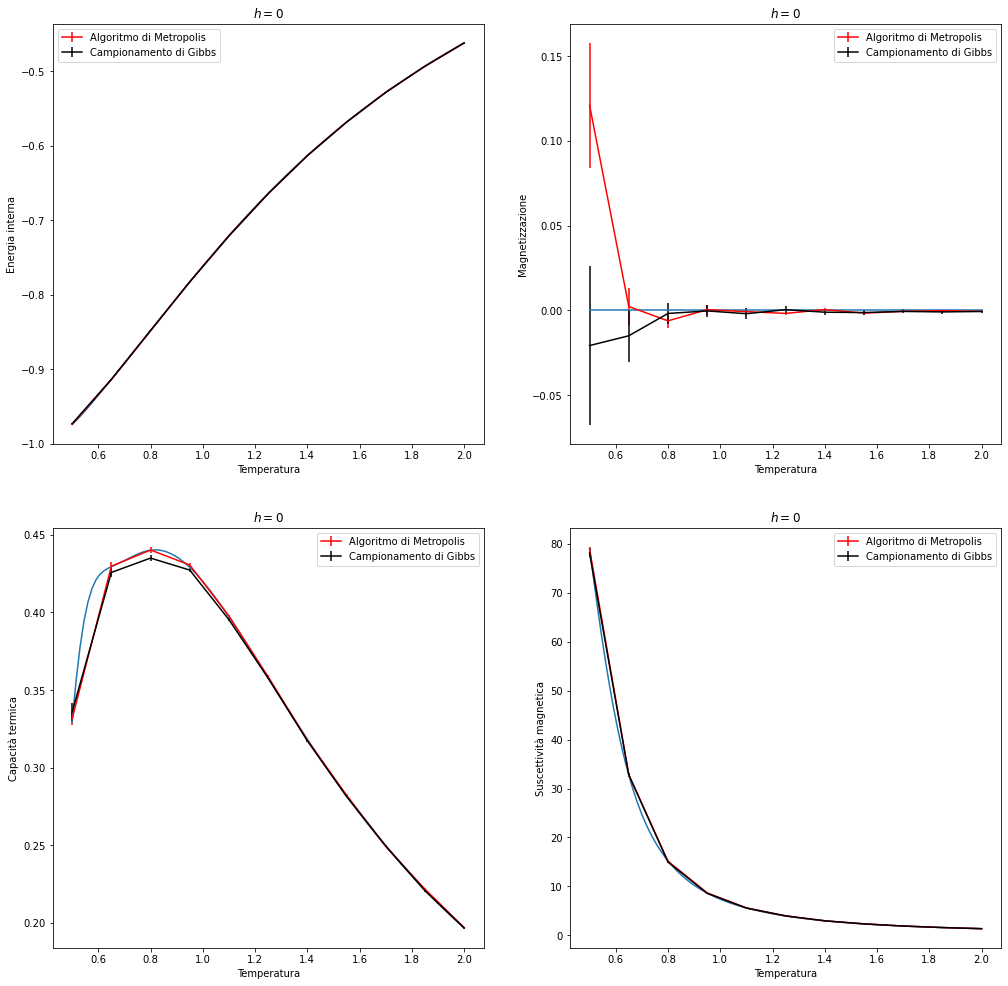

In [3]:
temp, U_blk, errU = np.loadtxt("./output.ene.T.h0.000000.metro", usecols=(0,1,2), unpack='true')
temp, mag_blk, errM = np.loadtxt("./output.mag.T.h0.000000.metro", usecols=(0,1,2), unpack='true')
temp, cal_blk, errC = np.loadtxt("./output.cal.T.h0.000000.metro", usecols=(0,1,2), unpack='true')
temp, X_blk, errX = np.loadtxt("./output.chi.T.h0.000000.metro", usecols=(0,1,2), unpack='true')

temp, U_blkG, errUG = np.loadtxt("./output.ene.T.h0.000000.gibbs", usecols=(0,1,2), unpack='true')
temp, mag_blkG, errMG = np.loadtxt("./output.mag.T.h0.000000.gibbs", usecols=(0,1,2), unpack='true')
temp, cal_blkG, errCG = np.loadtxt("./output.cal.T.h0.000000.gibbs", usecols=(0,1,2), unpack='true')
temp, X_blkG, errXG = np.loadtxt("./output.chi.T.h0.000000.gibbs", usecols=(0,1,2), unpack='true')

fig, plts = plt.subplots(2, 2)
fig.set_figwidth(17)
fig.set_figheight(17)

T = np.linspace(0.5,2.0,num=100)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
plts[0][0].plot(T, e)
plts[0][0].errorbar(temp, U_blk, yerr = errU, color = 'r', label = "Algoritmo di Metropolis")
plts[0][0].errorbar(temp, U_blkG, yerr = errUG, color = 'black', label = "Campionamento di Gibbs")
plts[0][0].set_xlabel("Temperatura")
plts[0][0].set_ylabel("Energia interna")

plts[0][1].plot(T, np.linspace(0,0,num=len(T)))
plts[0][1].errorbar(temp, mag_blk, yerr = errM, color = 'r', label = "Algoritmo di Metropolis")
plts[0][1].errorbar(temp, mag_blkG, yerr = errMG, color = 'black', label = "Campionamento di Gibbs")
plts[0][1].set_xlabel("Temperatura")
plts[0][1].set_ylabel("Magnetizzazione")

heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plts[1][0].plot(T, heat)
plts[1][0].errorbar(temp, cal_blk, yerr = errC, color = 'r', label = "Algoritmo di Metropolis")
plts[1][0].errorbar(temp, cal_blkG, yerr = errCG, color = 'black', label = "Campionamento di Gibbs")
plts[1][0].set_xlabel("Temperatura")
plts[1][0].set_ylabel("Capacità termica")

X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plts[1][1].plot(T, X)
plts[1][1].errorbar(temp, X_blk, yerr = errX, color = 'r', label = "Algoritmo di Metropolis")
plts[1][1].errorbar(temp, X_blkG, yerr = errXG, color = 'black', label = "Campionamento di Gibbs")
plts[1][1].set_xlabel("Temperatura")
plts[1][1].set_ylabel("Suscettività magnetica")

for i in range(2):
    for j in range(2):
        plts[i][j].legend()
        plts[i][j].set_title("$h = 0$")

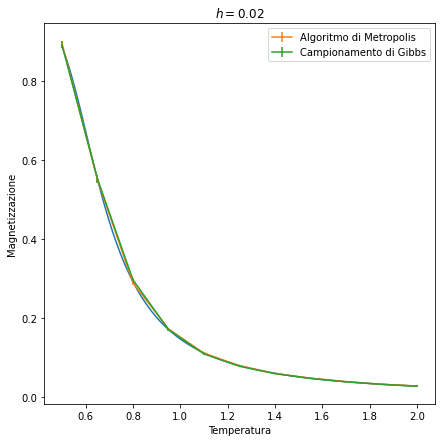

In [6]:
temp, mag_blk, errM = np.loadtxt("./output.mag.T.h0.020000.metro", usecols=(0,1,2), unpack='true')
temp, mag_blkG, errMG = np.loadtxt("./output.mag.T.h0.020000.gibbs", usecols=(0,1,2), unpack='true')

fig, plts = plt.subplots(1, 1)
fig.set_figwidth(7)
fig.set_figheight(7)

T = np.linspace(0.5,2.0,num=100)
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
plts.plot(T, M)
plts.errorbar(temp, mag_blk, yerr = errM, label = "Algoritmo di Metropolis")
plts.errorbar(temp, mag_blkG, yerr = errMG, label = "Campionamento di Gibbs")
plts.set_title("$h = 0.02$")
plts.set_xlabel("Temperatura")
plts.set_ylabel("Magnetizzazione")
plts.legend()

## Conclusioni

Non sembrano esserci particolari differenze tra i due algoritmi usati, che simulano correttamente il modello di Ising. Aggiungiamo qui che le transizioni tra stati proposte nell'algoritmo di Metropolis (inversione di un singolo spin casuale) non sono le uniche possibili. Si potrebbero invertire contemporaneamente blocchi di spin uguali consecutivi.

Una nota sulla magnetizzzione: per valori bassi di temperatura, è facile che vengano accettate molte più mosse che invertano lo spin, con la conseguenza che il valor medio della magnetizzazione presenti un bias, a meno che non vengano aumentati di molto i passi totali di simulazione. Per ragioni di tempo, si è deciso di non superare gli $800000$ passi.